In [1]:
import sys
sys.path.append('../')

In [2]:
from torchsummary import summary
from models.alexnet import AlexNet
from library.utils import Utils, DataLoader

In [3]:
net = AlexNet().cuda()

summary(net, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 54, 54]          11,712
              ReLU-2           [-1, 96, 54, 54]               0
         MaxPool2d-3           [-1, 96, 26, 26]               0
            Conv2d-4          [-1, 256, 26, 26]         614,656
              ReLU-5          [-1, 256, 26, 26]               0
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 384, 12, 12]         885,120
              ReLU-8          [-1, 384, 12, 12]               0
            Conv2d-9          [-1, 384, 12, 12]       1,327,488
             ReLU-10          [-1, 384, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         884,992
             ReLU-12          [-1, 256, 12, 12]               0
        MaxPool2d-13            [-1, 256, 5, 5]               0
           Linear-14                 [-

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


loss 0.249, train acc 0.908, test acc 0.899
3012.9 examples/sec on cuda:0


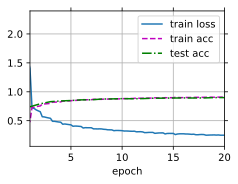

In [4]:
batch_size = 128

# 为了将 Fashion-MNIST 适配 AlexNet，这里将图片 resize 到 224 x 224（通常情况下不会这样做）
train_iter, test_iter = DataLoader().load_data_fashion_mnist(batch_size=batch_size, resize=224)

lr, num_epochs = 0.01, 20
Utils.train(net, train_iter, test_iter, num_epochs, lr, Utils.try_gpu())